In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings

In [ ]:
df = pd.read_csv('./PS_20174392719_1491204439457_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
246943,14,PAYMENT,4006.96,C935603188,0.0,0.00,M1278530331,0.0,0.0,0.0,0.0
246944,14,PAYMENT,12343.00,C91894559,0.0,0.00,M1608923559,0.0,0.0,0.0,0.0
246945,14,PAYMENT,12838.82,C1240146468,0.0,0.00,M590191625,0.0,0.0,0.0,0.0
246946,14,PAYMENT,1322.31,C1998299576,0.0,0.00,M425625085,0.0,0.0,0.0,0.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246948 entries, 0 to 246947
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            246948 non-null  int64  
 1   type            246948 non-null  object 
 2   amount          246948 non-null  float64
 3   nameOrig        246948 non-null  object 
 4   oldbalanceOrg   246948 non-null  float64
 5   newbalanceOrig  246947 non-null  float64
 6   nameDest        246947 non-null  object 
 7   oldbalanceDest  246947 non-null  float64
 8   newbalanceDest  246947 non-null  float64
 9   isFraud         246947 non-null  float64
 10  isFlaggedFraud  246947 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 20.7+ MB


Опишим числовые признаки в виде квантилей. Мы видим большие транзакции.

In [ ]:
df.describe(percentiles = [ 0.25, 0.5, 0.75, 0.9, 0.99])

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,246948.000000,2.469480e+05,2.469480e+05,2.469470e+05,2.469470e+05,2.469470e+05,246947.000000,246947.0
mean,10.734341,1.794316e+05,8.847152e+05,9.031845e+05,9.581795e+05,1.193714e+06,0.000652,0.0
std,2.365520,3.165947e+05,2.822045e+06,2.859473e+06,2.369456e+06,2.621727e+06,0.025525,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.241091e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,11.000000,7.387780e+04,1.882250e+04,0.000000e+00,6.448511e+04,1.616772e+05,0.000000,0.0
75%,13.000000,2.316636e+05,1.842933e+05,2.227989e+05,8.120236e+05,1.218324e+06,0.000000,0.0
90%,14.000000,4.180254e+05,2.280646e+06,2.394742e+06,2.612069e+06,3.364954e+06,0.000000,0.0
99%,14.000000,1.688649e+06,1.498942e+07,1.514267e+07,1.219152e+07,1.340456e+07,0.000000,0.0
max,14.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.133844e+07,4.138365e+07,1.000000,0.0


Расчитаем коэффицент Пирсона(степень взаимосвязи между двумя переменными)

<function matplotlib.pyplot.show(close=None, block=None)>

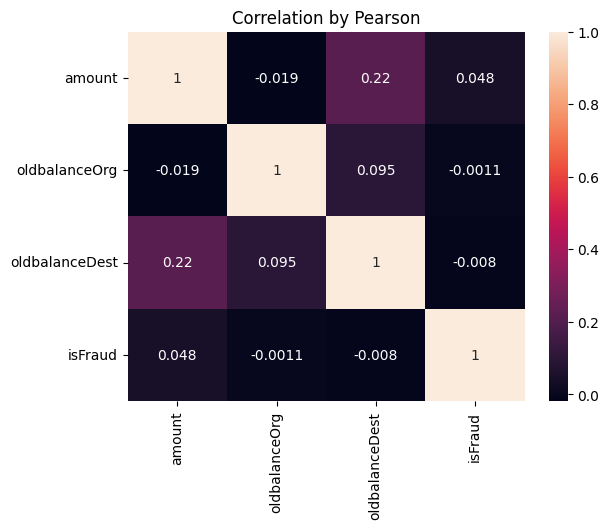

In [ ]:
df_corr =df[['amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud']]
corr_matrix = df_corr.corr(method = 'pearson')

sns.heatmap(corr_matrix, annot = True)

plt.title('Correlation by Pearson')
plt.show

<Axes: xlabel='isFraud', ylabel='amount'>

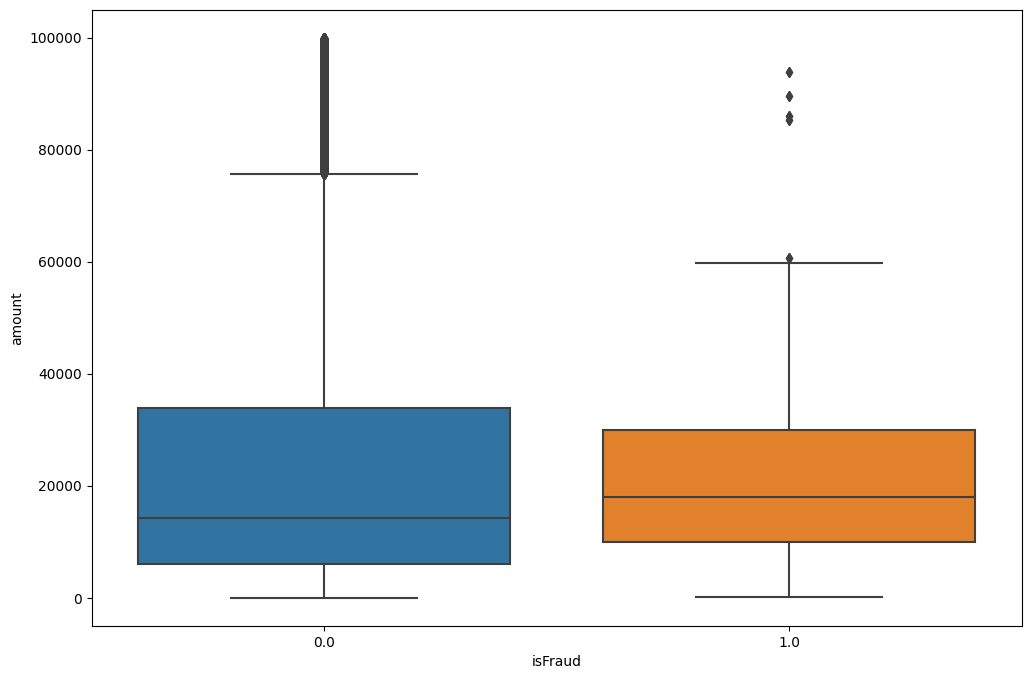

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'isFraud', y = 'amount', data = df[df.amount < 1e5])

<Axes: xlabel='type', ylabel='amount'>

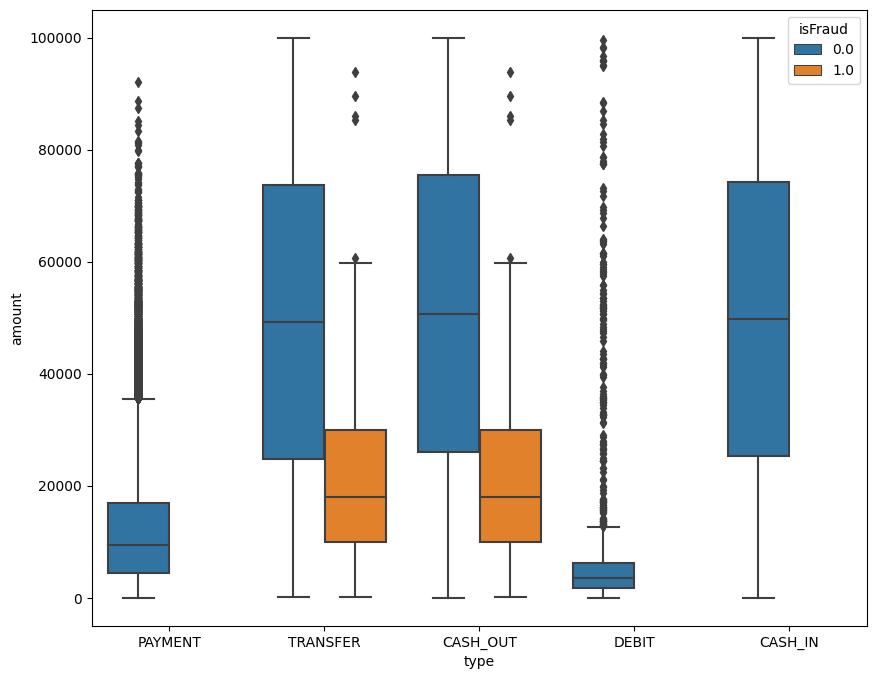

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(hue = 'isFraud', x = 'type', y = 'amount', data = df[df.amount < 1e5])

<Figure size 1200x800 with 0 Axes>

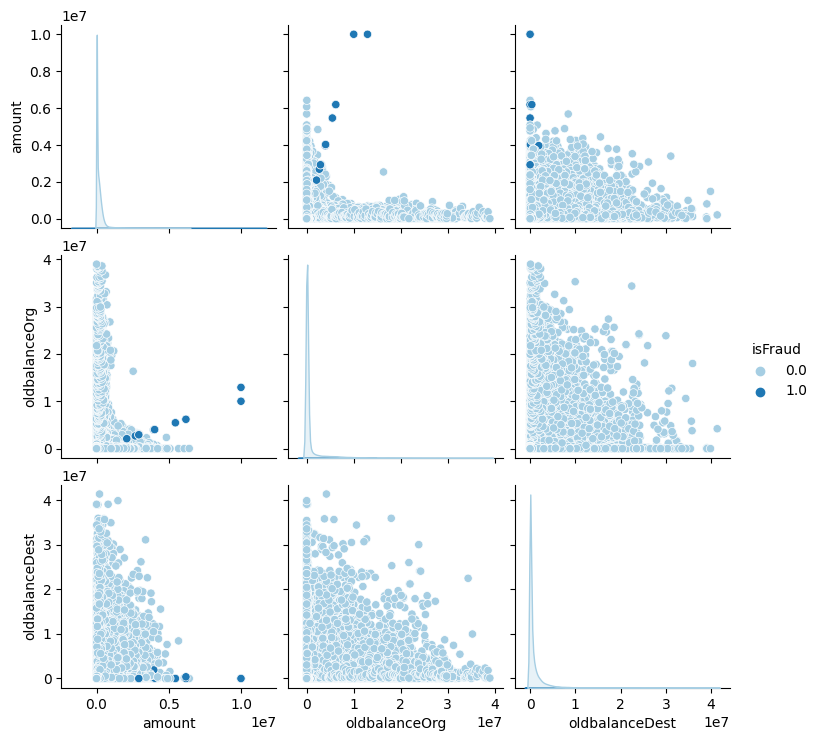

In [ ]:
plt.figure(figsize = (12,8))
sns.pairplot(df[['amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud']], hue = 'isFraud', palette = 'Paired')

((array([-4.54043976, -4.3497975 , -4.24638016, ...,  4.24638016,
          4.3497975 ,  4.54043976]),
  array([3.00000000e-01, 3.20000000e-01, 6.30000000e-01, ...,
         6.41983527e+06, 1.00000000e+07, 1.00000000e+07])),
 (232545.71941996118, 179431.61787392487, 0.7345094101446036))

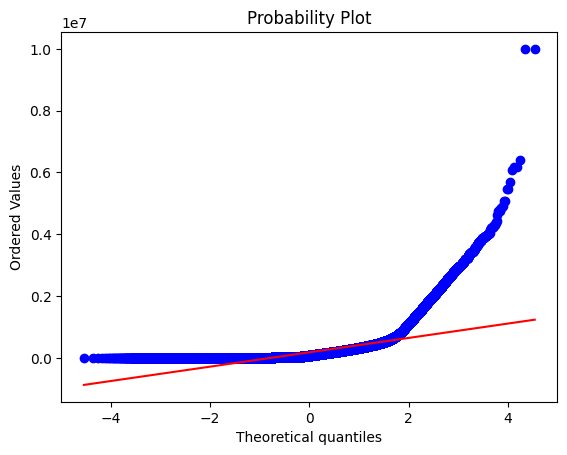

In [ ]:
from scipy.stats import probplot
fig = plt.figure()
ax = fig.add_subplot(111)

probplot(df['amount'], plot = ax)